# **1. ANN MODEL (Breast Cancer Dataset)**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/breast cancer.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
x = df.drop(["id","diagnosis"],axis=1)
y = df["diagnosis"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train.shape , x_test.shape

((455, 30), (114, 30))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
#Input Layer
model.add(Dense(30,activation='tanh',input_shape=(30,)))
#Hidden Layer
model.add(Dense(2,activation='tanh'))
#output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 995
Trainable params: 995
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
15/15 [==============================] - 4s 3ms/step - loss: 1.2518 - accuracy: 0.3736
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.9693 - accuracy: 0.3736
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5576 - accuracy: 0.7868
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5164 - accuracy: 0.8923
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4766 - accuracy: 0.8923
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.8835
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.8681
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4076 - accuracy: 0.8857
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8857
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3736 - accuracy: 0.8835
Epoch 11/20
15/15 [

In [ ]:
pred = model.predict(x_test)

In [ ]:
y_pred=(pred>0.5)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        72
           1       0.96      0.64      0.77        42

    accuracy                           0.86       114
   macro avg       0.89      0.81      0.84       114
weighted avg       0.88      0.86      0.85       114



In [ ]:
model=Sequential()
#Input Layer
model.add(Dense(30,activation='relu',input_shape=(30,)))
#Hidden Layer
model.add(Dense(50,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
15/15 [==============================] - 1s 3ms/step - loss: 5.0984 - accuracy: 0.5648
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.7223 - accuracy: 0.8088
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8857
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8769
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.9033
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.9077
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.9033
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.8374
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8747
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8791
Epoch 11/20
15/15 [

In [ ]:
pred = model.predict(x_test)

In [ ]:
y_pred=(pred>0.5)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        72
           1       1.00      0.81      0.89        42

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



# **2. CNN MODEL (Pneumonia Dataset)**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/Datasets/Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="training")
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/Datasets/Pneumonia Dataset/train",target_size=(224,224),batch_size=32,class_mode='binary',subset="validation")
test_dataset=test.flow_from_directory("/content/drive/MyDrive/Datasets/Pneumonia Dataset/test",target_size=(224,224),batch_size=32,class_mode='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
train_dataset[0][0].shape

(32, 224, 224, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import np_utils

In [ ]:

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(224,224,3)))
model.add(Dropout(0.4))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 32)        11648     
                                                                 
 dropout (Dropout)           (None, 54, 54, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        51264     
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                  

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### **a) Epochs 20,25,50**

In [ ]:
model1 = model.fit(train_dataset,batch_size=32,epochs=20,validation_data=valid_dataset,verbose=1)

Epoch 1/20
4/4 [==============================] - 93s 22s/step - loss: 1.7713 - accuracy: 0.4500 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.7081 - accuracy: 0.4583 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.6813 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.8929
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.6232 - accuracy: 0.7583 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 6s 2s/step - loss: 0.6357 - accuracy: 0.6250 - val_loss: 0.6696 - val_accuracy: 0.6429
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.5278 - accuracy: 0.6833 - val_loss: 0.6429 - val_accuracy: 0.7857
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.3711 - accuracy: 0.8583 - val_loss: 0.5797 - val_accuracy: 0.6786
Epoch 8/20
4/4 [=======================

In [ ]:
model2 = model.fit(train_dataset,batch_size=32,epochs=25,validation_data=valid_dataset,verbose=1)

Epoch 1/25
4/4 [==============================] - 6s 2s/step - loss: 0.1607 - accuracy: 0.9417 - val_loss: 0.4920 - val_accuracy: 0.8929
Epoch 2/25
4/4 [==============================] - 5s 1s/step - loss: 0.1805 - accuracy: 0.9333 - val_loss: 0.4648 - val_accuracy: 0.8929
Epoch 3/25
4/4 [==============================] - 5s 1s/step - loss: 0.1628 - accuracy: 0.9250 - val_loss: 0.5111 - val_accuracy: 0.7857
Epoch 4/25
4/4 [==============================] - 5s 1s/step - loss: 0.1570 - accuracy: 0.9333 - val_loss: 0.4321 - val_accuracy: 0.9286
Epoch 5/25
4/4 [==============================] - 5s 1s/step - loss: 0.1913 - accuracy: 0.9167 - val_loss: 0.4251 - val_accuracy: 0.8929
Epoch 6/25
4/4 [==============================] - 5s 1s/step - loss: 0.3660 - accuracy: 0.8667 - val_loss: 0.5373 - val_accuracy: 0.8214
Epoch 7/25
4/4 [==============================] - 5s 1s/step - loss: 0.2334 - accuracy: 0.9167 - val_loss: 0.6155 - val_accuracy: 0.7500
Epoch 8/25
4/4 [=========================

In [ ]:
model3 = model.fit(train_dataset,batch_size=32,epochs=50,validation_data=valid_dataset,verbose=1)

Epoch 1/50
4/4 [==============================] - 6s 2s/step - loss: 0.0606 - accuracy: 0.9750 - val_loss: 0.3827 - val_accuracy: 0.9286
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 0.0566 - accuracy: 0.9833 - val_loss: 0.3213 - val_accuracy: 0.9286
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 0.0766 - accuracy: 0.9583 - val_loss: 0.4158 - val_accuracy: 0.8571
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 0.1145 - accuracy: 0.9667 - val_loss: 0.2780 - val_accuracy: 0.9286
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 0.1124 - accuracy: 0.9583 - val_loss: 0.3061 - val_accuracy: 0.9286
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.0539 - accuracy: 0.9750 - val_loss: 0.3967 - val_accuracy: 0.8929
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 0.1077 - accuracy: 0.9500 - val_loss: 0.3794 - val_accuracy: 0.9286
Epoch 8/50
4/4 [=========================

### **b) Early Stopping Criteria**
### **c)Performance metrics of the model**

In [ ]:
model4 = model.fit(train_dataset,batch_size=32,epochs=25,validation_data=valid_dataset,callbacks=[earlystop],verbose=1)

Epoch 1/25
4/4 [==============================] - 6s 1s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.2153 - val_accuracy: 0.9643
Epoch 2/25
4/4 [==============================] - 5s 1s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2772 - val_accuracy: 0.9286
Epoch 3/25
4/4 [==============================] - 5s 1s/step - loss: 0.0982 - accuracy: 0.9750 - val_loss: 0.2154 - val_accuracy: 0.9286
Epoch 4/25
4/4 [==============================] - 5s 1s/step - loss: 0.0292 - accuracy: 0.9833 - val_loss: 0.2950 - val_accuracy: 0.8571
Epoch 4: early stopping


In [ ]:
model4.model.evaluate(test_dataset)

2/2 [==============================] - 6s 5s/step - loss: 0.0984 - accuracy: 0.9750


[0.0983855277299881, 0.9750000238418579]

### **d)Plotting for Epoch-25**

Text(0.5, 1.0, 'Training and validation loss')

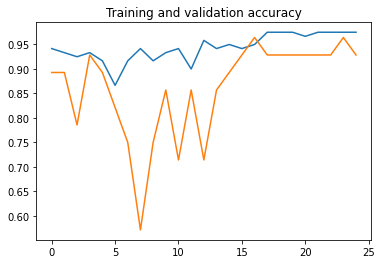

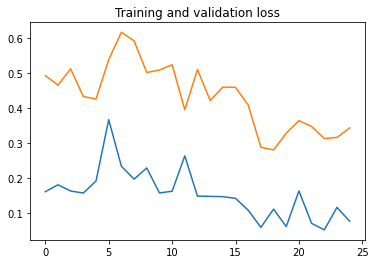

In [ ]:
import matplotlib.pyplot as plt

acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']


loss = model2.history['loss']
val_loss = model2.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

#**3. AlexNet Model & Pretrained VVG16 Model (Blood Cells Dataset)**

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

train1 = ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True,
                              
                               )  

test1 = ImageDataGenerator(rescale = 1./255)

In [ ]:
train=train1.flow_from_directory("/content/drive/MyDrive/Datasets/dataset2-master/images/TRAIN",target_size=(227,227),batch_size=32,class_mode='categorical',color_mode='rgb',subset="training", shuffle=True)
valid=train1.flow_from_directory("/content/drive/MyDrive/Datasets/dataset2-master/images/TRAIN",target_size=(227,227),batch_size=32,class_mode='categorical',color_mode='rgb',subset="validation", shuffle=True)
test=test1.flow_from_directory("/content/drive/MyDrive/Datasets/dataset2-master/images/TEST",target_size=(227,227),batch_size=32,class_mode='categorical',color_mode='rgb', shuffle=True)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


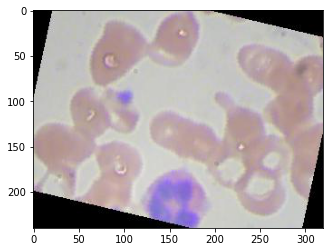

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Datasets/dataset2-master/images/TEST/EOSINOPHIL/_0_1616.jpeg')
imgplot = plt.imshow(img)
plt.show()

### **With Batch Normalisation**

In [ ]:
#After Batch Normalisation
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (227,227,3),kernel_size = (11, 11), strides = (4, 4),padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Flattening
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())
# Output Softmax Layer
model.add(Dense(4))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 activation_49 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 activation_50 (Activation)  (None, 17, 17, 256)      

In [ ]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import numpy as np

In [ ]:
np.unique(train.classes)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train.classes),
                                        y = train.classes                                                    
                                    )
cw = dict(zip(np.unique(train.classes), class_weights))
print(cw)

{0: 0.996996996996997, 1: 1.0025163563160544, 2: 1.0045385779122542, 3: 0.996}


In [ ]:
model.compile(optimizer=SGD(momentum=0.5),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early = EarlyStopping(monitor="val_loss", 
                      mode="min",restore_best_weights=True, 
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [ ]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,
                        restore_best_weights=True)

In [ ]:
train

In [ ]:
len(train)

249

In [ ]:
cnn4 = model.fit(train, epochs=5,steps_per_epoch=len(train)//32,shuffle=True,callbacks=callbacks_list,validation_data=valid)

Epoch 1/5
7/7 [==============================] - 137s 20s/step - loss: 2.0209 - accuracy: 0.2902 - val_loss: 11.9405 - val_accuracy: 0.2494 - lr: 0.0100
Epoch 2/5
7/7 [==============================] - 140s 21s/step - loss: 2.2960 - accuracy: 0.3170 - val_loss: 34.2857 - val_accuracy: 0.2494 - lr: 0.0100
Epoch 3/5
7/7 [==============================] - ETA: 0s - loss: 1.9970 - accuracy: 0.3438 
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
7/7 [==============================] - 127s 18s/step - loss: 1.9970 - accuracy: 0.3438 - val_loss: 38.9226 - val_accuracy: 0.2494 - lr: 0.0100
Epoch 4/5
7/7 [==============================] - 112s 17s/step - loss: 2.1355 - accuracy: 0.3125 - val_loss: 28.4783 - val_accuracy: 0.2494 - lr: 0.0030


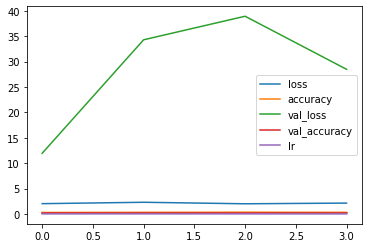

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.DataFrame(cnn4.history).plot()

In [ ]:
cnn4.model.evaluate(test)

78/78 [==============================] - 8s 105ms/step - loss: 11.9272 - accuracy: 0.2493


[11.927233695983887, 0.24929633736610413]

In [ ]:
y_pred =  model.predict_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
np.unique(y_pred)

array([3])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes,y_pred)

array([[  0,   0,   0, 623],
       [  0,   0,   0, 620],
       [  0,   0,   0, 620],
       [  0,   0,   0, 624]])

In [ ]:
test.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
print(classification_report(test.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       623
           1       0.00      0.00      0.00       620
           2       0.00      0.00      0.00       620
           3       0.25      1.00      0.40       624

    accuracy                           0.25      2487
   macro avg       0.06      0.25      0.10      2487
weighted avg       0.06      0.25      0.10      2487



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Without Batch Normalisation**

In [ ]:
#AlexNet model without batch normalization

model2=Sequential()
model2.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3)))
model2.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model2.add(Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model2.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(4096,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(4096,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(4,activation='softmax'))

In [ ]:
model2.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn5 = model2.fit(train, validation_data=valid, epochs=5, steps_per_epoch=len(train)//32, callbacks=[earlystop], batch_size=32, shuffle=True)

Epoch 1/5
7/7 [==============================] - 108s 16s/step - loss: 1.3975 - accuracy: 0.2545 - val_loss: 1.3868 - val_accuracy: 0.2509
Epoch 2/5
7/7 [==============================] - 98s 14s/step - loss: 1.3895 - accuracy: 0.2321 - val_loss: 1.3879 - val_accuracy: 0.2509
Epoch 3/5
7/7 [==============================] - 92s 14s/step - loss: 1.3907 - accuracy: 0.2188 - val_loss: 1.3863 - val_accuracy: 0.2509
Epoch 4/5
7/7 [==============================] - 98s 15s/step - loss: 1.3895 - accuracy: 0.1875 - val_loss: 1.3869 - val_accuracy: 0.2494
Epoch 5/5
7/7 [==============================] - 88s 13s/step - loss: 1.3847 - accuracy: 0.2768 - val_loss: 1.3873 - val_accuracy: 0.2509


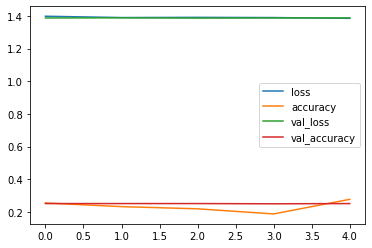

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.DataFrame(cnn5.history).plot()

In [ ]:
model2.evaluate(test)

78/78 [==============================] - 8s 105ms/step - loss: 1.3873 - accuracy: 0.2509


[1.387280821800232, 0.25090470910072327]

In [ ]:
y_pred1 =  model2.predict_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred1=np.argmax(y_pred1,axis=1)

In [ ]:
np.unique(y_pred1)

array([1, 2, 3])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes,y_pred1)

array([[  0,   8,  79, 536],
       [  0,  14,  63, 543],
       [  0,  14,  76, 530],
       [  0,  12,  67, 545]])

In [ ]:
test.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
print(classification_report(test.classes,y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       623
           1       0.29      0.02      0.04       620
           2       0.27      0.12      0.17       620
           3       0.25      0.87      0.39       624

    accuracy                           0.26      2487
   macro avg       0.20      0.25      0.15      2487
weighted avg       0.20      0.26      0.15      2487



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


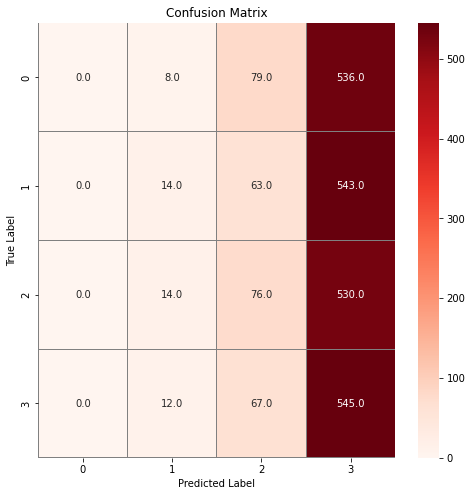

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(test.classes,y_pred1) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## **VGG16**

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=ImageDataGenerator(rescale=1./255,
                            rotation_range=5,
                            zoom_range=.2,
                            horizontal_flip=True,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)
train_data=train.flow_from_directory('/content/drive/MyDrive/Datasets/dataset2-master/images/TRAIN',color_mode='rgb',
                                        target_size=(256,256),
                                        batch_size=1,
                                        shuffle=True,subset="training")
val_data=train.flow_from_directory('/content/drive/MyDrive/Datasets/dataset2-master/images/TRAIN',color_mode='rgb',
                                        target_size=(256,256),
                                        batch_size=1,
                                        shuffle=True,subset="validation")
test_data=test.flow_from_directory('/content/drive/MyDrive/Datasets/dataset2-master/images/TEST',color_mode='rgb',
                                        target_size=(256,256),
                                        batch_size=1,
                                        shuffle=True)

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [ ]:
train_data[10][1][0]

array([0., 0., 1., 0.], dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


5493
1684
4195
5074
3992
5023
2599
3577
5340
5391
4743
2157
2797
1674
1346
5544
5630
2034


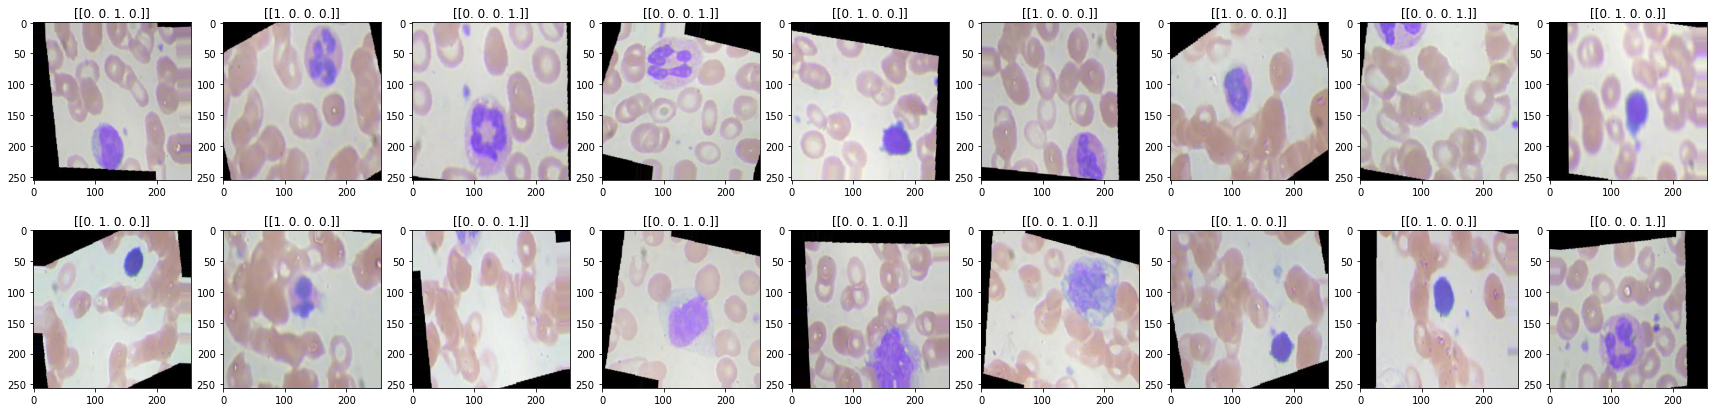

In [ ]:
import random
fig = plt.figure(figsize=(30, 7))
randomlist = random.sample(range(10, 30), 10)
rows = 2
columns = 9
for j in range(0,18):
  for i in random.sample(range(0, 6000), 18):
    fig.add_subplot(rows, columns, j+1)
    plt.title(train_data[i][1][0])
    plt.imshow(train_data[i][0][0])
  print(i)

In [ ]:
print(train_data[0][1][0])

[0. 0. 0. 1.]


[0. 1. 0. 0.]


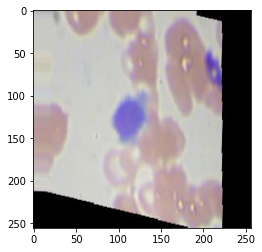

In [ ]:
print(train1[0][1][0])
plt.imshow(train1[0][0][0])

[0. 0. 0. 1.]


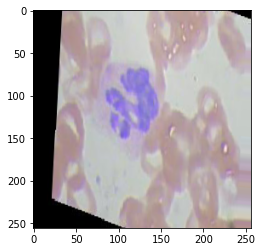

In [ ]:
plt.imshow(train_data[0][0][0])
print(train_data[0][1][0])

In [ ]:
for img, lbl in train_data:
    print(len(img))
    break

16


In [ ]:
np.unique(train_data.labels)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
import os
src_path = "/content/drive/MyDrive/Datasets/dataset2-master/images/TRAIN"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
path = os.path.join(src_path,sub_class[0])
for i in range(4):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.jpeg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

path = os.path.join(src_path,sub_class[1])
for i in range(4,8):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.jpeg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
train1[0]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.7943766 , 0.7899396 , 0.7836428 ],
          [0.7984854 , 0.79064226, 0.79456383],
          [0.7913452 , 0.78350204, 0.7874236 ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.78889024, 0.78448856, 0.77844065],
          [0.7944662 , 0.78727436, 0.79087025],
          [0.7877092 , 0.7803514 , 0.7839488 ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.7847144 , 0.7814129 , 0.77508146],
          [0.7850706 , 0.7842432 , 0.78465694],
          [0.7812752 , 0.7802448 , 0.7804652 ]],
 
         ...,
 
         [[0.00134544, 0.00163423, 0.        ],
          [0.43345

In [ ]:
np.shape(train_data)

In [ ]:
import cv2 
import os 
import glob 
img_dir = "/content/drive/MyDrive/Datasets/dataset2-master/images/TRAIN" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 
for f1 in files: 
    img = cv2.imread(f1) 
    data.append(img)

In [ ]:
from keras.applications.vgg16 import VGG16
vgg_model=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3),classifier_activation='softmax')

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
x = Flatten()(vgg_model.output)
x=Dense(4096,activation='relu')(x)

In [ ]:

prediction=Dense(4, activation='softmax')(x)


In [ ]:
model = Model(inputs=vgg_model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5,restore_best_weights=True)
#Early stopping to avoid overfitting of model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
len(train_data)

498

In [ ]:
# fit the model
cnn2 = model.fit(
 train_data,
  
  validation_data=val_data,
  epochs=10,steps_per_epoch=len(train_data),
  callbacks=[early_stop,checkpoint],
  batch_size=32,shuffle=True)

Epoch 1/10
498/498 [==============================] - ETA: 0s - loss: 1.5769 - accuracy: 0.6029

498/498 [==============================] - 1593s 3s/step - loss: 1.5769 - accuracy: 0.6029 - val_loss: 0.5961 - val_accuracy: 0.7637
Epoch 2/10
498/498 [==============================] - ETA: 0s - loss: 0.6047 - accuracy: 0.7578

498/498 [==============================] - 143s 286ms/step - loss: 0.6047 - accuracy: 0.7578 - val_loss: 0.5657 - val_accuracy: 0.7793
Epoch 3/10
498/498 [==============================] - ETA: 0s - loss: 0.4713 - accuracy: 0.8146

498/498 [==============================] - 145s 291ms/step - loss: 0.4713 - accuracy: 0.8146 - val_loss: 0.6771 - val_accuracy: 0.7210
Epoch 4/10
498/498 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.8412

498/498 [==============================] - 144s 290ms/step - loss: 0.4096 - accuracy: 0.8412 - val_loss: 0.5758 - val_accuracy: 0.7441
Epoch 5/10
498/498 [==============================] - ETA: 0s - loss: 0.3606 - accuracy: 0.8572

498/498 [==============================] - 144s 289ms/step - loss: 0.3606 - accuracy: 0.8572 - val_loss: 0.5165 - val_accuracy: 0.8004
Epoch 6/10
498/498 [==============================] - ETA: 0s - loss: 0.3418 - accuracy: 0.8657

498/498 [==============================] - 141s 284ms/step - loss: 0.3418 - accuracy: 0.8657 - val_loss: 0.2587 - val_accuracy: 0.8989
Epoch 7/10
498/498 [==============================] - ETA: 0s - loss: 0.2842 - accuracy: 0.8908

498/498 [==============================] - 144s 290ms/step - loss: 0.2842 - accuracy: 0.8908 - val_loss: 0.2910 - val_accuracy: 0.8874
Epoch 8/10
498/498 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.8858

498/498 [==============================] - 144s 289ms/step - loss: 0.3029 - accuracy: 0.8858 - val_loss: 0.3293 - val_accuracy: 0.8587
Epoch 9/10
498/498 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.9005

498/498 [==============================] - 142s 284ms/step - loss: 0.2512 - accuracy: 0.9005 - val_loss: 0.3749 - val_accuracy: 0.8582
Epoch 10/10
498/498 [==============================] - ETA: 0s - loss: 0.2353 - accuracy: 0.9111

498/498 [==============================] - 143s 288ms/step - loss: 0.2353 - accuracy: 0.9111 - val_loss: 0.2611 - val_accuracy: 0.9005


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

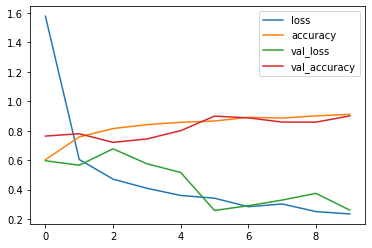

In [ ]:
pd.DataFrame(cnn2.history).plot()

In [ ]:
cnn2.model.evaluate(test_data)

156/156 [==============================] - 851s 5s/step - loss: 1.6264 - accuracy: 0.5782


[1.6264017820358276, 0.5782066583633423]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import tensorflow as tf

In [ ]:
CLASS_NAMES = list(train_data.class_indices.keys())

In [ ]:
CLASS_NAMES

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_data)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_data.classes,y_pred)

array([[197, 146,  98, 182],
       [188, 110, 116, 206],
       [200, 129, 101, 190],
       [194, 145, 100, 185]])

In [ ]:
print(accuracy_score(test_data.classes,y_pred))

0.23843988741455568


In [ ]:
print(classification_report(test_data.classes,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.32      0.28       623
           1       0.21      0.18      0.19       620
           2       0.24      0.16      0.20       620
           3       0.24      0.30      0.27       624

    accuracy                           0.24      2487
   macro avg       0.24      0.24      0.23      2487
weighted avg       0.24      0.24      0.23      2487



In [ ]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

Test_datest_data Accuracy 23.84398874145557%


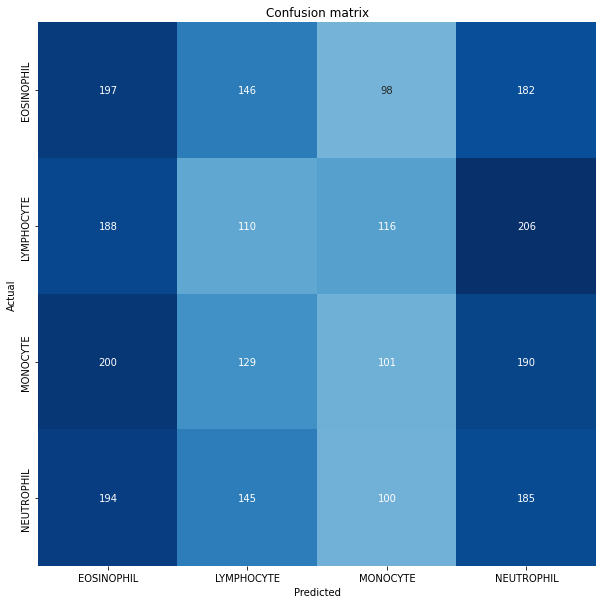

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.25      0.32      0.28       623
  LYMPHOCYTE       0.21      0.18      0.19       620
    MONOCYTE       0.24      0.16      0.20       620
  NEUTROPHIL       0.24      0.30      0.27       624

    accuracy                           0.24      2487
   macro avg       0.24      0.24      0.23      2487
weighted avg       0.24      0.24      0.23      2487



In [ ]:

predictions = np.argmax(model.predict(test_data), axis = 1)

acc = accuracy_score(test_data.labels, y_pred)
cm = confusion_matrix(test_data.labels, y_pred)
clr = classification_report(test_data.labels, y_pred, target_names = CLASS_NAMES)

print(f"Test_datest_data Accuracy {acc * 100}%")
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot = True, fmt = 'g', vmin 
= 0, cmap = 'Blues', cbar = False)
plt.xticks(np.arange(4) + 0.5, labels = CLASS_NAMES)
plt.yticks(np.arange(4) + 0.5, labels = CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)